# Tratamiento de los valores perdidos

Cargamos los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ejemplo_valores_perdidos.csv")

Lo primero que debemos hacer es visualizar los datos

In [ ]:
print(data)

                   date    ws     wd    nox    no2    o3  pm10     so2  \
0      01/01/1998 00:00  0.60  280.0  285.0   39.0   1.0  29.0  4.7225   
1      01/01/1998 01:00  2.16  230.0    NaN    NaN   NaN  37.0     NaN   
2      01/01/1998 02:00  2.76  190.0    NaN    NaN   3.0  34.0  6.8300   
3      01/01/1998 03:00  2.16  170.0  493.0   52.0   3.0  35.0  7.6625   
4      01/01/1998 04:00  2.40  180.0  468.0   78.0   2.0  34.0  8.0700   
...                 ...   ...    ...    ...    ...   ...   ...     ...   
65528  23/06/2005 08:00  1.50  260.0  388.0  145.0   6.0  48.0     NaN   
65529  23/06/2005 09:00  1.50  210.0  404.0  168.0   7.0  58.0     NaN   
65530  23/06/2005 10:00  2.60  240.0  387.0  175.0  10.0  55.0     NaN   
65531  23/06/2005 11:00  3.10  220.0  312.0  125.0  15.0  52.0     NaN   
65532  23/06/2005 12:00  3.10  220.0  287.0  119.0  17.0  55.0     NaN   

              co  pm25  
0       3.372500   NaN  
1            NaN   NaN  
2       9.602500   NaN  
3      10.2

Tambien podemos visualizar un numero determinado para mayor comodidad

In [ ]:
data.head(n=10)

,date,ws,wd,nox,no2,o3,pm10,so2,co,pm25
0,01/01/1998 00:00,0.60,280.0,285.0,39.0,1.0,29.0,4.7225,3.3725,NaN
1,01/01/1998 01:00,2.16,230.0,NaN,NaN,NaN,37.0,NaN,NaN,NaN
2,01/01/1998 02:00,2.76,190.0,NaN,NaN,3.0,34.0,6.8300,9.6025,NaN
3,01/01/1998 03:00,2.16,170.0,493.0,52.0,3.0,35.0,7.6625,10.2175,NaN
4,01/01/1998 04:00,2.40,180.0,468.0,78.0,2.0,34.0,8.0700,8.9125,NaN
5,01/01/1998 05:00,3.00,190.0,264.0,42.0,0.0,16.0,5.5050,3.0525,NaN
6,01/01/1998 06:00,3.00,140.0,171.0,38.0,0.0,11.0,4.2300,2.2650,NaN
7,01/01/1998 07:00,3.00,170.0,195.0,51.0,0.0,12.0,3.8750,1.9950,NaN
8,01/01/1998 08:00,3.36,170.0,137.0,42.0,1.0,12.0,3.3475,1.4550,NaN
9,01/01/1998 09:00,3.96,170.0,113.0,39.0,2.0,12.0,2.9225,1.2050,NaN


Tambien tenemos la opcion de realizar un "resumen estadistico" de cada una de las variables.

In [ ]:
data.describe()

,ws,wd,nox,no2,o3,pm10,so2,co,pm25
count,64907.000000,65314.000000,63110.000000,63095.000000,62947.000000,63372.000000,55499.000000,63604.000000,56759.000000
mean,4.488275,200.027100,178.798558,49.129757,7.122150,34.381856,4.754911,1.463840,21.695343
std,2.398349,94.457268,121.515278,22.638220,7.539047,20.467023,3.648367,1.120033,12.637921
min,-0.240000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-2.167474,-0.033333,-1.000000
25%,2.600000,140.000000,82.000000,33.000000,2.000000,22.000000,2.103333,0.634583,13.000000
50%,4.100000,210.000000,153.000000,46.000000,4.000000,31.000000,4.000000,1.140000,20.000000
75%,5.760000,270.000000,249.000000,61.000000,10.000000,44.000000,6.500000,1.980000,28.000000
max,20.160000,360.000000,1144.000000,206.000000,70.000000,801.000000,63.205000,19.705000,398.000000


Una vez conocidos nuestros datos procedemos a analizar su completitud.<br>
Tenemos que saber cuantos valores perdidos tenemos de cada variable antes de tomar una decision sobre como proceder.

La función isnull() nos devuelve un Dataframe con las mismas filas y columnas que el original, pero en las celdas tenemos el valor booleano que nos informa de si en esa posición hay almacenado o no un valor perdido.

In [ ]:
data.isnull()

,date,ws,wd,nox,no2,o3,pm10,so2,co,pm25
0,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,True,True,False,True,True,True
2,False,False,False,True,True,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
65528,False,False,False,False,False,False,False,True,False,False
65529,False,False,False,False,False,False,False,True,False,False
65530,False,False,False,False,False,False,False,True,False,False
65531,False,False,False,False,False,False,False,True,False,False


La función `sum()` nos hace una primera suma por columnas, de manera que sabemos cuántos valores perdidos hay en cada variable a estudiar.

In [ ]:
data.isnull().sum()

date        0
ws        626
wd        219
nox      2423
no2      2438
o3       2586
pm10     2161
so2     10034
co       1929
pm25     8774
dtype: int64

Otra opcion es calcular el porcentaje respecto al número de registros totalesque siempre es mas representativo.

In [ ]:
print("Porcentajes de valores perdidos por cada variable:")
data.isnull().sum()/len(data.index)*100

Porcentajes de valores perdidos por variable


date     0.000000
ws       0.955244
wd       0.334183
nox      3.697374
no2      3.720263
o3       3.946103
pm10     3.297575
so2     15.311370
co       2.943555
pm25    13.388674
dtype: float64

## Análisis gráfico de los valores perdidos

El análisis gráfico de valores perdidos es una parte crucial del proceso de exploración de datos y limpieza de datos. Aquí hay algunas herramientas y técnicas que puedes utilizar para analizar gráficamente los valores perdidos en tus conjuntos de datos:

1. **Matriz de valores perdidos:**
   - **Descripción:** Una matriz de valores perdidos es una representación gráfica de los valores perdidos en tu conjunto de datos.
   - **Herramienta:** Puedes utilizar bibliotecas como `missingno` en Python para crear una matriz de valores perdidos.

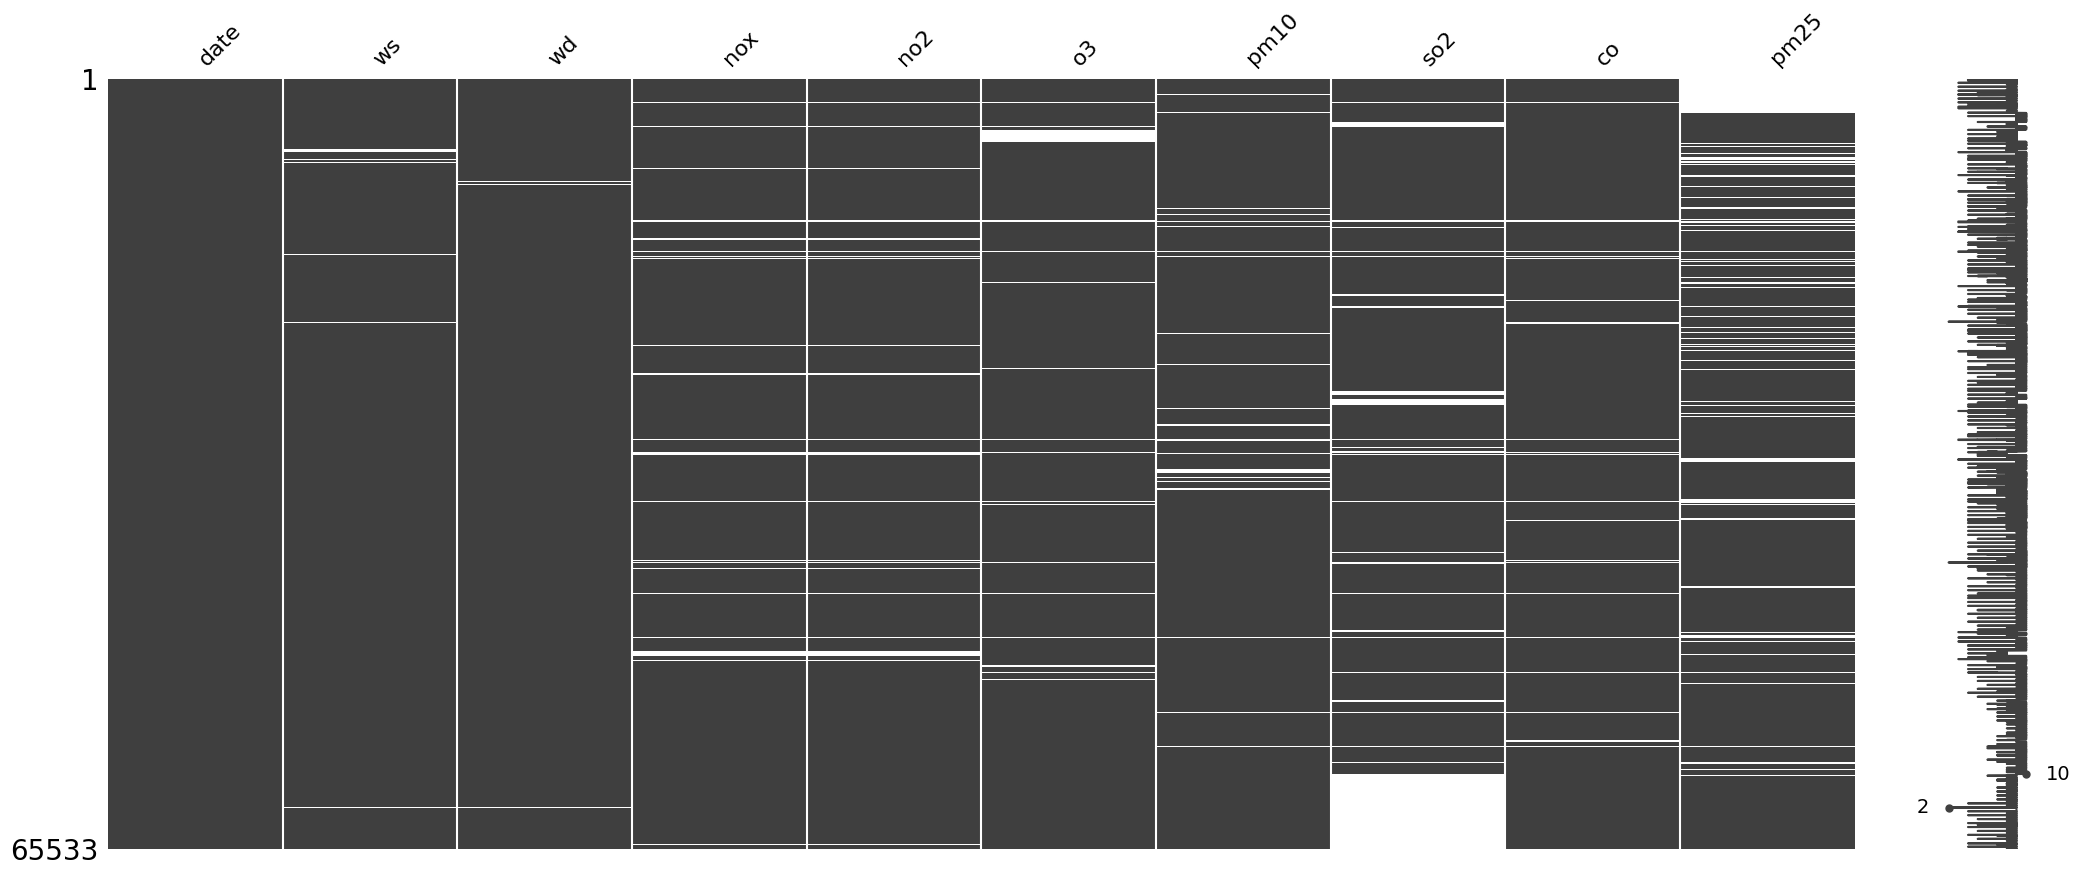

In [ ]:
import missingno as msno
msno.matrix(data);

2. **Mapa de calor de correlación de valores perdidos:**
   - **Descripción:** Muestra la correlación entre las columnas con valores perdidos. Puedes identificar patrones de valores perdidos que se producen juntos.
   - **Herramienta:** Utiliza la función `heatmap` de `seaborn` en Python.

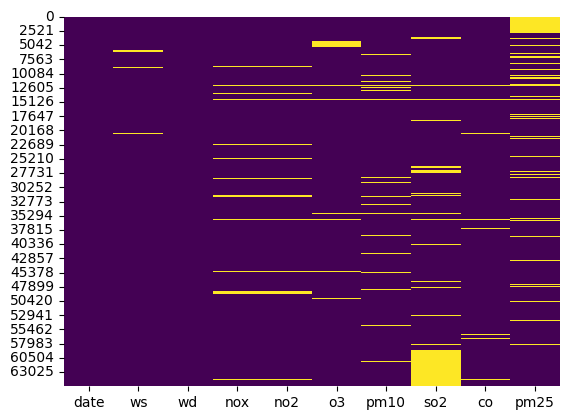

In [ ]:
import seaborn as sns
sns.heatmap(data.isnull(), cbar=False, cmap='viridis');

3. **Diagrama de barras de valores perdidos:**
   - **Descripción:** Muestra la cantidad de valores perdidos en cada columna.
   - **Herramienta:** Puedes utilizar `missingno` o simplemente contar y visualizar los valores perdidos con bibliotecas como `matplotlib` o `seaborn`.

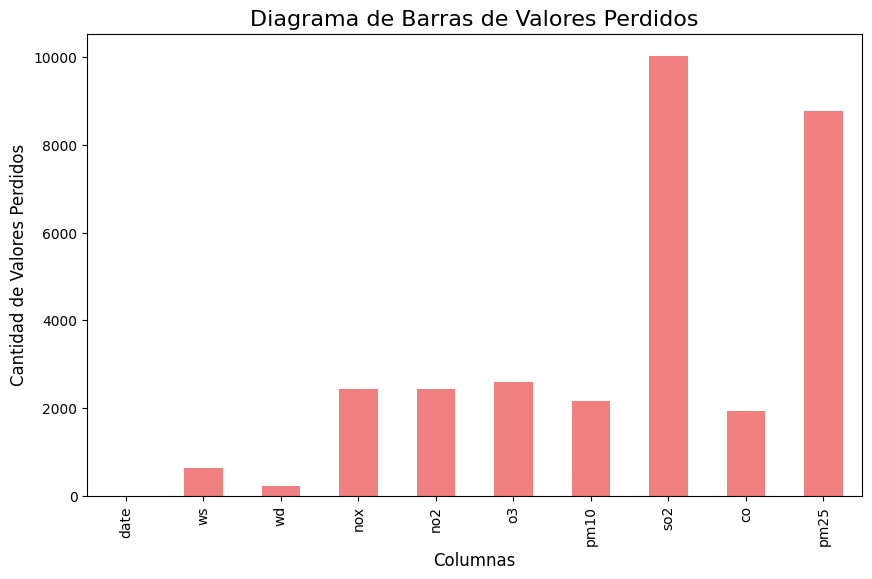

In [ ]:
# Calcular la cantidad de valores perdidos por columna
missing_values = data.isnull().sum()

# Visualizar el diagrama de barras de valores perdidos
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='lightcoral')
plt.title('Diagrama de Barras de Valores Perdidos', fontsize=16)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Cantidad de Valores Perdidos', fontsize=12)
plt.show()

## Eliminación de los registros con valores perdidos

La primera opcion es borrar todas las filas que contengan algun dato perdido.

Esta es la opcion menos adecuada ya que supone una importante perdida de infomacion

Una vez eliminados los datos, los visualizamos

In [ ]:
datoscomp=data.dropna()
print(datoscomp)

                   date   ws     wd    nox    no2    o3  pm10       so2  \
2887   01/05/1998 07:00  3.6  350.0   81.0   37.0  13.0  24.0  2.897500   
2888   01/05/1998 08:00  3.6  350.0  107.0   43.0  12.0  23.0  3.132500   
2889   01/05/1998 09:00  3.6  340.0  127.0   34.0  11.0  21.0  3.100000   
2890   01/05/1998 10:00  3.0  350.0  122.0   50.0  10.0  23.0  3.237500   
2891   01/05/1998 11:00  3.6  350.0  115.0   37.0  12.0  25.0  3.235000   
...                 ...  ...    ...    ...    ...   ...   ...       ...   
59148  30/09/2004 12:00  4.6  240.0  467.0  120.0   1.0  59.0  6.987676   
59149  30/09/2004 13:00  5.2  240.0  467.0  124.0   1.0  74.0  7.375880   
59150  30/09/2004 14:00  4.6  240.0  421.0  126.0   2.0  60.0  6.534771   
59151  30/09/2004 15:00  4.6  240.0  414.0  113.0   2.0  56.0  6.470070   
59152  30/09/2004 16:00  4.6  250.0  370.0  106.0   1.0  54.0  6.081866   

             co  pm25  
2887   0.810000  16.0  
2888   0.910000  16.0  
2889   1.185000  15.0  
289

Con esta funcion nos vemos si existen (TRUE) o no (FALSE) datos perdidos

In [ ]:
datoscomp.isnull().any()
# datoscomp.isnull().any().any()

date    False
ws      False
wd      False
nox     False
no2     False
o3      False
pm10    False
so2     False
co      False
pm25    False
dtype: bool

## Imputación de los valores perdidos
La opcion de eliminar los datos, como hemos dicho, nos lleva a perder informacion que puede ser relevante.

Otra opción es imputar un valor a esas casillas vacías.
Existen varias opciones para imputar los datos.

Volvemos a cargar los datos originales.

In [ ]:
import os
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ejemplo_valores_perdidos.csv")

In [ ]:
# Me aseguro de que haya valores perdidos
data.isnull().any()

date    False
ws       True
wd       True
nox      True
no2      True
o3       True
pm10     True
so2      True
co       True
pm25     True
dtype: bool

El metodo de imputacion mas sencillo es la media

In [ ]:
data=data.fillna(data.mean())

<ipython-input-38-2fdd91382263>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=data.fillna(data.mean())


Procedemos a comprobar que no existen valores perdidos

In [ ]:
data.isnull().any()

date    False
ws      False
wd      False
nox     False
no2     False
o3      False
pm10    False
so2     False
co      False
pm25    False
dtype: bool

Volvemos a cargar los datos

In [ ]:
import os
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ejemplo_valores_perdidos.csv")

In [ ]:
# Comprobamos que hay valores perdidos nuevamente
data.isnull().any().any()

True

En esta ocasión vamos a seleccionar las columnas que son numéricas

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65533 entries, 0 to 65532
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    65533 non-null  object 
 1   ws      64907 non-null  float64
 2   wd      65314 non-null  float64
 3   nox     63110 non-null  float64
 4   no2     63095 non-null  float64
 5   o3      62947 non-null  float64
 6   pm10    63372 non-null  float64
 7   so2     55499 non-null  float64
 8   co      63604 non-null  float64
 9   pm25    56759 non-null  float64
dtypes: float64(9), object(1)
memory usage: 5.0+ MB


Seleccionamos columnas numéricas

In [ ]:
datoNum = data.select_dtypes(include='number')

# o bien:
# import numpy as np
# datoNum = data.select_dtypes(include=np.number)

In [ ]:
datoNum.head()

,ws,wd,nox,no2,o3,pm10,so2,co,pm25
0,0.60,280.0,285.0,39.0,1.0,29.0,4.7225,3.3725,NaN
1,2.16,230.0,NaN,NaN,NaN,37.0,NaN,NaN,NaN
2,2.76,190.0,NaN,NaN,3.0,34.0,6.8300,9.6025,NaN
3,2.16,170.0,493.0,52.0,3.0,35.0,7.6625,10.2175,NaN
4,2.40,180.0,468.0,78.0,2.0,34.0,8.0700,8.9125,NaN


Ha quedado excluida la fecha, la guardamos en una variable y la concatenaremos después.

In [ ]:
data["date"] = pd.to_datetime(data["date"])
fecha = data.select_dtypes(include='datetime')

In [ ]:
data["date"]

0       1998-01-01 00:00:00
1       1998-01-01 01:00:00
2       1998-01-01 02:00:00
3       1998-01-01 03:00:00
4       1998-01-01 04:00:00
                ...        
65528   2005-06-23 08:00:00
65529   2005-06-23 09:00:00
65530   2005-06-23 10:00:00
65531   2005-06-23 11:00:00
65532   2005-06-23 12:00:00
Name: date, Length: 65533, dtype: datetime64[ns]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as sk

# Imputar la media
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
datoNum_imputed = imp.fit_transform(datoNum)

# Convertir el resultado de nuevo a DataFrame
datoNum_imputed_df = pd.DataFrame(datoNum_imputed, columns=datoNum.columns)

# Concatenar fecha y datos imputados
datos_completos = pd.concat([fecha, datoNum_imputed_df], axis=1)

In [ ]:
datos_completos

,date,ws,wd,nox,no2,o3,pm10,so2,co,pm25
0,1998-01-01 00:00:00,0.60,280.0,285.0,39.0,1.0,29.0,4.7225,3.372500,20.0
1,1998-01-01 01:00:00,2.16,230.0,153.0,46.0,4.0,37.0,4.0000,1.140000,20.0
2,1998-01-01 02:00:00,2.76,190.0,153.0,46.0,3.0,34.0,6.8300,9.602500,20.0
3,1998-01-01 03:00:00,2.16,170.0,493.0,52.0,3.0,35.0,7.6625,10.217500,20.0
4,1998-01-01 04:00:00,2.40,180.0,468.0,78.0,2.0,34.0,8.0700,8.912500,20.0
...,...,...,...,...,...,...,...,...,...,...
65528,2005-06-23 08:00:00,1.50,260.0,388.0,145.0,6.0,48.0,4.0000,1.637931,26.0
65529,2005-06-23 09:00:00,1.50,210.0,404.0,168.0,7.0,58.0,4.0000,1.293103,34.0
65530,2005-06-23 10:00:00,2.60,240.0,387.0,175.0,10.0,55.0,4.0000,1.293103,34.0
65531,2005-06-23 11:00:00,3.10,220.0,312.0,125.0,15.0,52.0,4.0000,1.293103,33.0


In [ ]:
# Nos aseguramos de que no haya valores perdidos.
datos_completos.isnull().any().any()

False

In [ ]:
datos_completos.describe().T

,count,mean,std,min,25%,50%,75%,max
ws,65533.0,4.484566,2.387165,-0.240000,2.610000,4.10,5.760000,20.160
wd,65533.0,200.060428,94.301060,0.000000,140.000000,210.00,270.000000,360.000
nox,65533.0,177.844689,119.346975,0.000000,85.000000,153.00,244.000000,1144.000
no2,65533.0,49.013322,22.221018,0.000000,34.000000,46.00,61.000000,206.000
o3,65533.0,6.998947,7.413759,-1.000000,2.000000,4.00,10.000000,70.000
pm10,65533.0,34.270337,20.135790,-1.000000,22.000000,31.00,43.000000,801.000
so2,65533.0,4.639323,3.368444,-2.167474,2.495856,4.00,5.953333,63.205
co,65533.0,1.454307,1.104782,-0.033333,0.650000,1.14,1.950000,19.705
pm25,65533.0,21.468359,11.775654,-1.000000,14.000000,20.00,26.000000,398.000


Volvemos a cargar los datos

In [ ]:
import os
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ejemplo_valores_perdidos.csv")

In [ ]:
# Otra opcion es imputar la mediana
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as sk

# Imputar la media
imp = SimpleImputer(missing_values=np.nan, strategy='median')
datoNum_imputed = imp.fit_transform(datoNum)

# Convertir el resultado de nuevo a DataFrame
datoNum_imputed_df = pd.DataFrame(datoNum_imputed, columns=datoNum.columns)

# Concatenar fecha y datos imputados
datos_completos = pd.concat([fecha, datoNum_imputed_df], axis=1)

In [ ]:
# Nos aseguramos de que no haya valores perdidos.
datos_completos.isnull().any().any()

False

In [ ]:
datos_completos.describe().T

,count,mean,std,min,25%,50%,75%,max
ws,65533.0,4.479790,2.388429,-0.240000,2.610000,4.100000,5.760000,20.160
wd,65533.0,200.060428,94.301060,0.000000,140.000000,210.000000,270.000000,360.000
nox,65533.0,174.849816,120.938559,0.000000,75.000000,147.000000,244.000000,1144.000
no2,65533.0,48.715700,22.312771,0.000000,34.000000,44.000000,61.000000,206.000
o3,65533.0,6.920025,7.455790,-1.000000,2.000000,4.000000,10.000000,70.000
pm10,65533.0,34.039507,20.211937,-1.000000,22.000000,30.000000,43.000000,801.000
so2,65533.0,4.179982,3.619504,-2.167474,1.115000,3.267385,5.953333,63.205
co,65533.0,1.433438,1.117149,-0.033333,0.603448,1.120690,1.950000,19.705
pm25,65533.0,20.665039,12.049890,-1.000000,14.000000,17.000000,26.000000,398.000


Volvemos a cargar los datos

In [ ]:
import os
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ejemplo_valores_perdidos.csv")

La ultima opcion dentro de la imputacion por valores fijos es la moda o valor mas frecuente.

Esto se usa especialmete para variables categóricas.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as sk

# Imputar la media
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
datoNum_imputed = imp.fit_transform(datoNum)

# Convertir el resultado de nuevo a DataFrame
datoNum_imputed_df = pd.DataFrame(datoNum_imputed, columns=datoNum.columns)

# Concatenar fecha y datos imputados
datos_completos = pd.concat([fecha, datoNum_imputed_df], axis=1)

In [ ]:
# Nos aseguramos de que no haya valores perdidos.
datos_completos.isnull().any().any()

False

In [ ]:
datos_completos.describe().T

,count,mean,std,min,25%,50%,75%,max
ws,65533.0,4.479790,2.388429,-0.240000,2.610000,4.100000,5.760000,20.160
wd,65533.0,200.060428,94.301060,0.000000,140.000000,210.000000,270.000000,360.000
nox,65533.0,174.849816,120.938559,0.000000,75.000000,147.000000,244.000000,1144.000
no2,65533.0,48.715700,22.312771,0.000000,34.000000,44.000000,61.000000,206.000
o3,65533.0,6.920025,7.455790,-1.000000,2.000000,4.000000,10.000000,70.000
pm10,65533.0,34.039507,20.211937,-1.000000,22.000000,30.000000,43.000000,801.000
so2,65533.0,4.179982,3.619504,-2.167474,1.115000,3.267385,5.953333,63.205
co,65533.0,1.433438,1.117149,-0.033333,0.603448,1.120690,1.950000,19.705
pm25,65533.0,20.665039,12.049890,-1.000000,14.000000,17.000000,26.000000,398.000


Estas son las formas que existen para estimar los valores perdidos basándonos en valores estadisticos.

En ocasiones es mas acertado utilizar otros metodos, especialmente si las variables estan relacionadas entre si.

## "bfill" para series temporales
Volvemos a cargar los datos

In [ ]:
import os
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ejemplo_valores_perdidos.csv")

Al tratarse de una serie temporal se puede sustituir por el valor anterior de dicha serie


In [ ]:
data1=data.fillna(method='bfill')

In [ ]:
datos_completos.isnull().any().any()

False

## Imputación múltiple

Volvemos a cargar los datos

In [ ]:
import os
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ejemplo_valores_perdidos.csv")

Para este caso necesitamos saber el tipo de dato que hay en cada columna.

In [ ]:
data.dtypes

date     object
ws      float64
wd      float64
nox     float64
no2     float64
o3      float64
pm10    float64
so2     float64
co      float64
pm25    float64
dtype: object

La imputacion multiple adecuada cuando las variables explicativas estan relacionadas entre si.

Previamente realizaremos una matriz de correlacion.

In [ ]:
data.corr()

<ipython-input-101-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,ws,wd,nox,no2,o3,pm10,so2,co,pm25
ws,1.000000,0.051587,0.075319,0.061167,0.155183,0.018223,-0.003738,0.141586,-0.051649
wd,0.051587,1.000000,0.031440,0.004231,-0.052213,-0.079822,-0.014870,0.032436,-0.083612
nox,0.075319,0.031440,1.000000,0.787449,-0.514328,0.616835,0.707666,0.824944,0.653458
no2,0.061167,0.004231,0.787449,1.000000,-0.395677,0.575147,0.586845,0.539951,0.527447
o3,0.155183,-0.052213,-0.514328,-0.395677,1.000000,-0.284114,-0.360566,-0.410052,-0.330930
pm10,0.018223,-0.079822,0.616835,0.575147,-0.284114,1.000000,0.492744,0.454962,0.836028
so2,-0.003738,-0.014870,0.707666,0.586845,-0.360566,0.492744,1.000000,0.637431,0.549194
co,0.141586,0.032436,0.824944,0.539951,-0.410052,0.454962,0.637431,1.000000,0.537201
pm25,-0.051649,-0.083612,0.653458,0.527447,-0.330930,0.836028,0.549194,0.537201,1.000000


Se puede observar que existe cierta correlacion entre las variables dependientes.

Esto es un indicador de que puede ser adecuado utilizar metodos de imputacion multiple.

Hasta ahora hemos separado las columnas manualmente ya que estamos trabajando con pocos datos.

Con grandes bases de datos en los que se entremezclen datos numéricos con otro tipo de datos puede generar problemas.
Por ello podemos separarlos en funcion de su tipologia.

Para utilizar fancyimpute es necesario instalar su librería ejecutando `pip install fancyimpute`

> En caso de que este código genere problemas al ejecutarse en local ir a anaconda Promt y escribir<br>
1. `conda install ecos`  
2. `conda install CVXcanon`  
3. `pip install fancyimpute`  
>
>En caso de que siga generando problemas analizar las dependencias adicionales exigidas, en mi caso fue ipykernel
`pip install ipykernel`
y despues: `pip install fancyimpute`

In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.5 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=0c1fa291b84e2e9be97fd94c83cdf24eced6056d2ddadbca26b4adec0e849e3a
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=7d1e7bdc915613483deed1b158477c6a6c7a340f1c2e1de7912a10d983dbf210
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


## MICE Multiple Imputation by Chained Equation
MICE utiliza imputación múltiple en lugar de imputación única, lo que genera incertidumbre estadística. MICE realiza regresión múltiple sobre los datos de muestra y toma promedios de ellos.

In [ ]:
import pandas as pd
import numpy as np
from fancyimpute import IterativeImputer

# Suponiendo que 'data' es tu DataFrame original
datoNum = data.select_dtypes(include=[float])
fecha = data.select_dtypes(include=[object])

# Convertir a matrices numpy
datoNum = datoNum.to_numpy()

# Imputar valores faltantes usando IterativeImputer
imputer = IterativeImputer()
datoNumcomp = imputer.fit_transform(datoNum)

# Crear DataFrames con los datos imputados
datoNumcomp = pd.DataFrame(datoNumcomp)
fecha = pd.DataFrame(fecha)

# Concatenar los DataFrames
datos_completos = pd.concat([fecha, datoNumcomp], axis=1)

# Establecer los nombres de las columnas e índices
datos_completos.columns = data.columns
datos_completos.index = data.index

# Mostrar el DataFrame completo
print(datos_completos)

                   date    ws     wd         nox         no2         o3  pm10  \
0      01/01/1998 00:00  0.60  280.0  285.000000   39.000000   1.000000  29.0   
1      01/01/1998 01:00  2.16  230.0  183.063580   49.893889   5.497856  37.0   
2      01/01/1998 02:00  2.76  190.0  654.162185   76.495987   3.000000  34.0   
3      01/01/1998 03:00  2.16  170.0  493.000000   52.000000   3.000000  35.0   
4      01/01/1998 04:00  2.40  180.0  468.000000   78.000000   2.000000  34.0   
...                 ...   ...    ...         ...         ...        ...   ...   
65528  23/06/2005 08:00  1.50  260.0  388.000000  145.000000   6.000000  48.0   
65529  23/06/2005 09:00  1.50  210.0  404.000000  168.000000   7.000000  58.0   
65530  23/06/2005 10:00  2.60  240.0  387.000000  175.000000  10.000000  55.0   
65531  23/06/2005 11:00  3.10  220.0  312.000000  125.000000  15.000000  52.0   
65532  23/06/2005 12:00  3.10  220.0  287.000000  119.000000  17.000000  55.0   

             so2         co

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
datos_completos.isnull().any().any()

False